In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
column_names = ["Time", "Ax", "Ay", "Az", "Gx", "Gy", "Gz"]


In [3]:
def load_data(file_path):
    with open(file_path, 'r') as file:
        # Read all lines from the file, skipping the first four metadata lines
        lines = file.readlines()[4:]
        print(file)
        # Initialize an empty list to hold parsed data
        data = []
        # count=0
        # Process each line, split by comma, and strip any leading/trailing whitespace
        for line in lines:
            values = line.strip().split(',')
            # print(values)
            if len(values) == len(column_names):  # Ensure correct number of columns
                data.append(values)
            # if count<=5:
            #     print(column_names)
            #     print(data)
            #     count+=1
            
        
        # Create DataFrame with specified column names
        df = pd.DataFrame(data, columns=column_names)
        # df = df.dropna(inplace=True)
        
        
        # Convert numeric columns to float where applicable
        numeric_columns = column_names[1:]  # Exclude 'Time (s)'
        print(numeric_columns)
        df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
        
    return df

In [4]:
files = {
    'LA': 'test1_new_recorded/LA.csv',
    'RA': 'test1_new_recorded/RA.csv',
    'LS': 'test1_new_recorded/LS.csv',
    'RS': 'test1_new_recorded/RS.csv',
    'LT': 'test1_new_recorded/LT.csv',
    'RT': 'test1_new_recorded/RT.csv'
}

In [5]:
# Load data for each body part
data = {key: load_data(file) for key, file in files.items()}
# print(data['LH'])

<_io.TextIOWrapper name='test1_new_recorded/LA.csv' mode='r' encoding='utf-8'>
['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']
<_io.TextIOWrapper name='test1_new_recorded/RA.csv' mode='r' encoding='utf-8'>
['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']
<_io.TextIOWrapper name='test1_new_recorded/LS.csv' mode='r' encoding='utf-8'>
['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']
<_io.TextIOWrapper name='test1_new_recorded/RS.csv' mode='r' encoding='utf-8'>
['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']
<_io.TextIOWrapper name='test1_new_recorded/LT.csv' mode='r' encoding='utf-8'>
['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']
<_io.TextIOWrapper name='test1_new_recorded/RT.csv' mode='r' encoding='utf-8'>
['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']


In [6]:
print(data['LA'].head())
print(data['RA'].head())
print(data['LS'].head())
print(data['RS'].head())
print(data['LT'].head())
print(data['RT'].head())

    Time    Ax    Ay    Az    Gx    Gy    Gz
0  14882 -0.00  0.01  1.00 -0.19  0.21 -0.55
1  14887 -0.00  0.01  1.01 -0.24  0.09 -0.51
2  14893  0.00  0.01  1.00 -0.19  0.31 -0.57
3  14898  0.00  0.01  1.00 -0.02  0.28 -0.63
4  14903  0.01  0.01  1.00 -0.02  0.20 -0.47
    Time    Ax    Ay    Az    Gx    Gy    Gz
0  14883 -0.01  0.01  1.00  0.27 -0.08  0.30
1  14888  0.00  0.01  0.99  0.15 -0.11 -0.06
2  14893  0.00 -0.00  0.99  0.24  0.31 -0.19
3  14899 -0.00  0.00  0.99  0.35  0.02  0.12
4  14904  0.01  0.00  1.00 -0.09 -0.11 -0.14
    Time   Ax   Ay    Az    Gx    Gy    Gz
0  14880  0.0  0.0  1.00  0.54  0.05  0.09
1  14886  0.0 -0.0  1.00  0.30 -0.05  0.27
2  14891  0.0  0.0  1.01  0.21  0.00  0.57
3  14896  0.0  0.0  1.01  0.44  0.05  0.35
4  14902  0.0 -0.0  1.00  0.66 -0.01  0.21
    Time    Ax   Ay    Az    Gx    Gy    Gz
0  14881 -0.00 -0.0  1.01  0.47  0.02 -0.53
1  14886  0.00  0.0  1.00  0.26  0.18 -0.56
2  14892  0.01 -0.0  1.00  0.02  0.12 -0.69
3  14897  0.01  0.0  0.99 

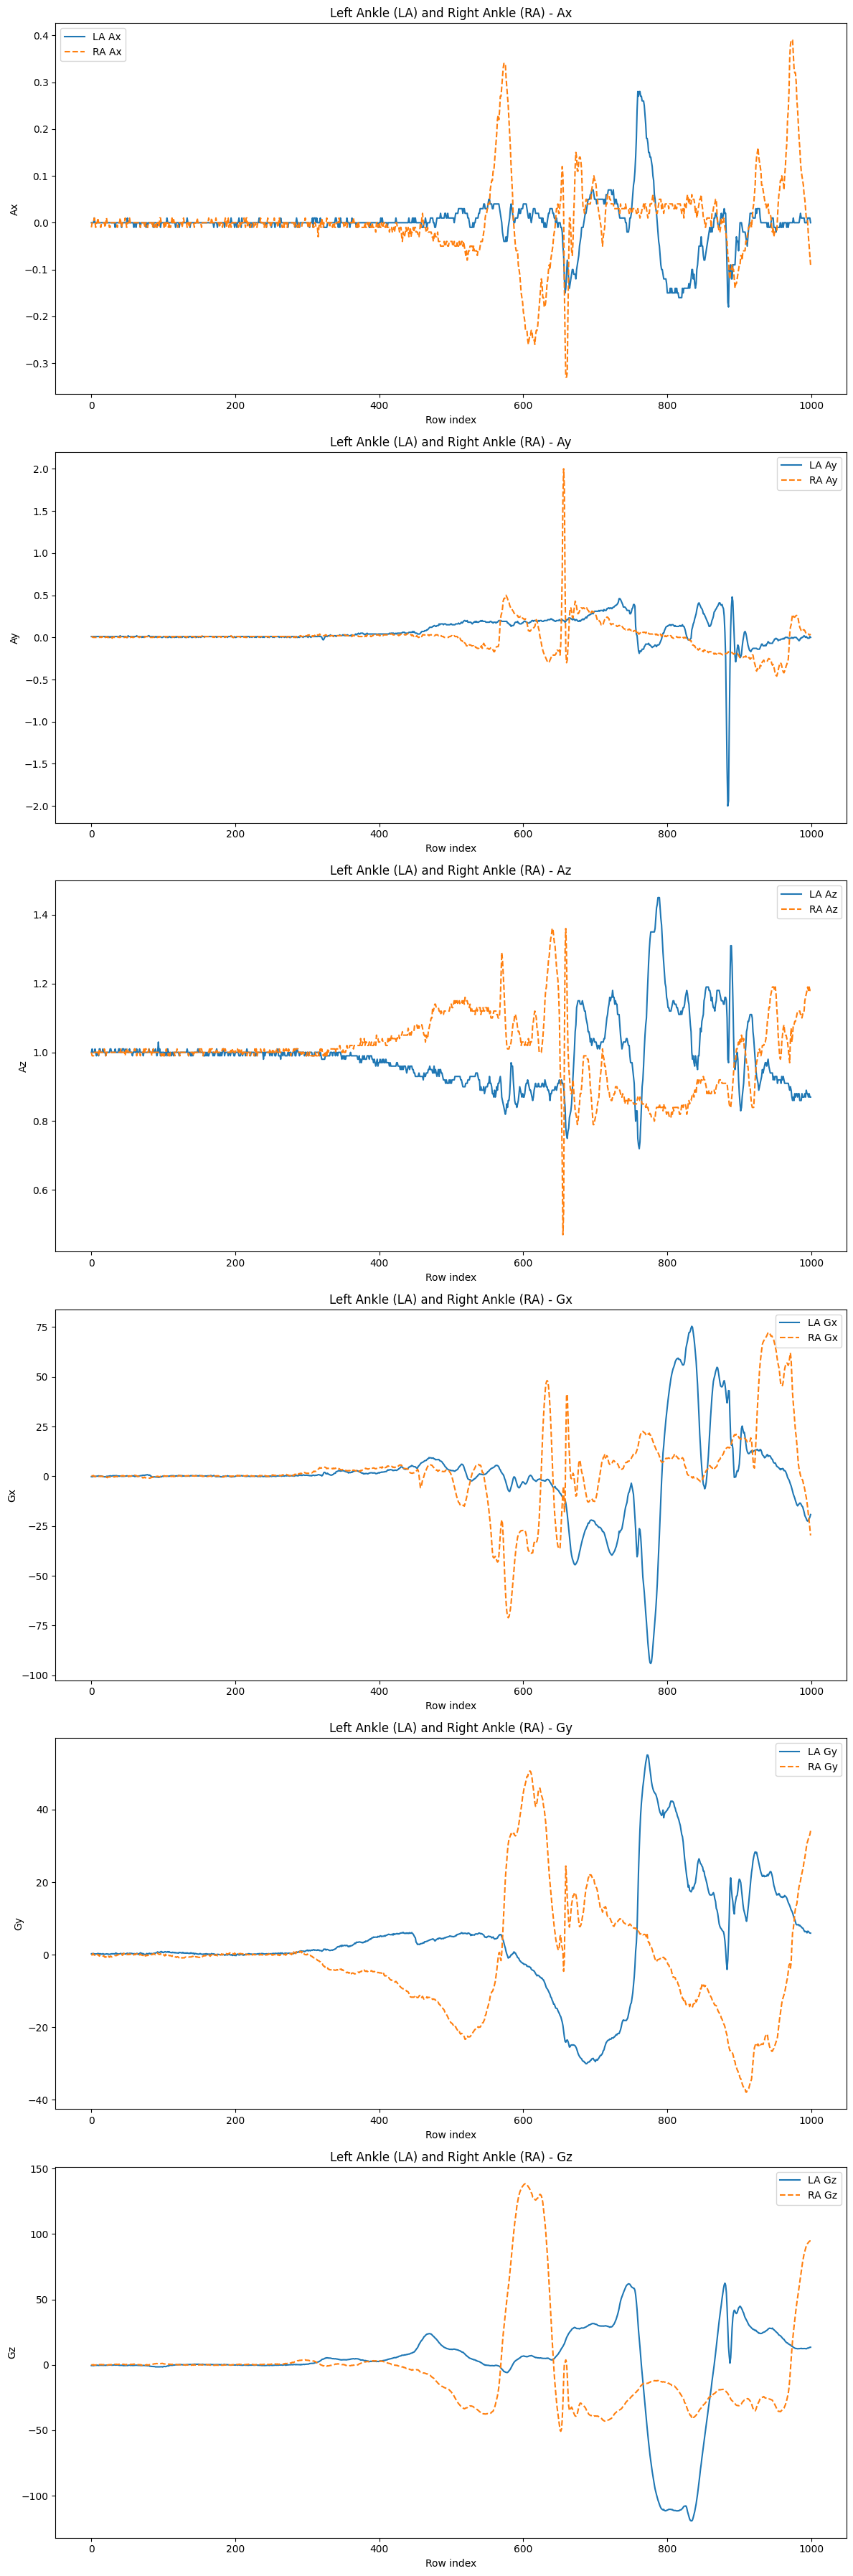

In [7]:
import matplotlib.pyplot as plt

def plot_all_ankle(data):
    fig, axes = plt.subplots(6, 1, figsize=(12, 36))

    comparisons = [
        ('LA', 'RA', 'Ax', 'Left Ankle (LA) and Right Ankle (RA) - Ax'),
        ('LA', 'RA', 'Ay', 'Left Ankle (LA) and Right Ankle (RA) - Ay'),
        ('LA', 'RA', 'Az', 'Left Ankle (LA) and Right Ankle (RA) - Az'),
        ('LA', 'RA', 'Gx', 'Left Ankle (LA) and Right Ankle (RA) - Gx'),
        ('LA', 'RA', 'Gy', 'Left Ankle (LA) and Right Ankle (RA) - Gy'),
        ('LA', 'RA', 'Gz', 'Left Ankle (LA) and Right Ankle (RA) - Gz')
    ]

    for ax, (label1, label2, column, title) in zip(axes, comparisons):
        ax.plot(data[label1].index[:1000], data[label1][column].iloc[:1000], label=f'{label1} {column}')
        ax.plot(data[label2].index[:1000], data[label2][column].iloc[:1000], label=f'{label2} {column}', linestyle='dashed')
        
        ax.set_title(title)
        ax.set_xlabel('Row index')
        ax.set_ylabel(column)
        ax.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
plot_all_ankle(data)


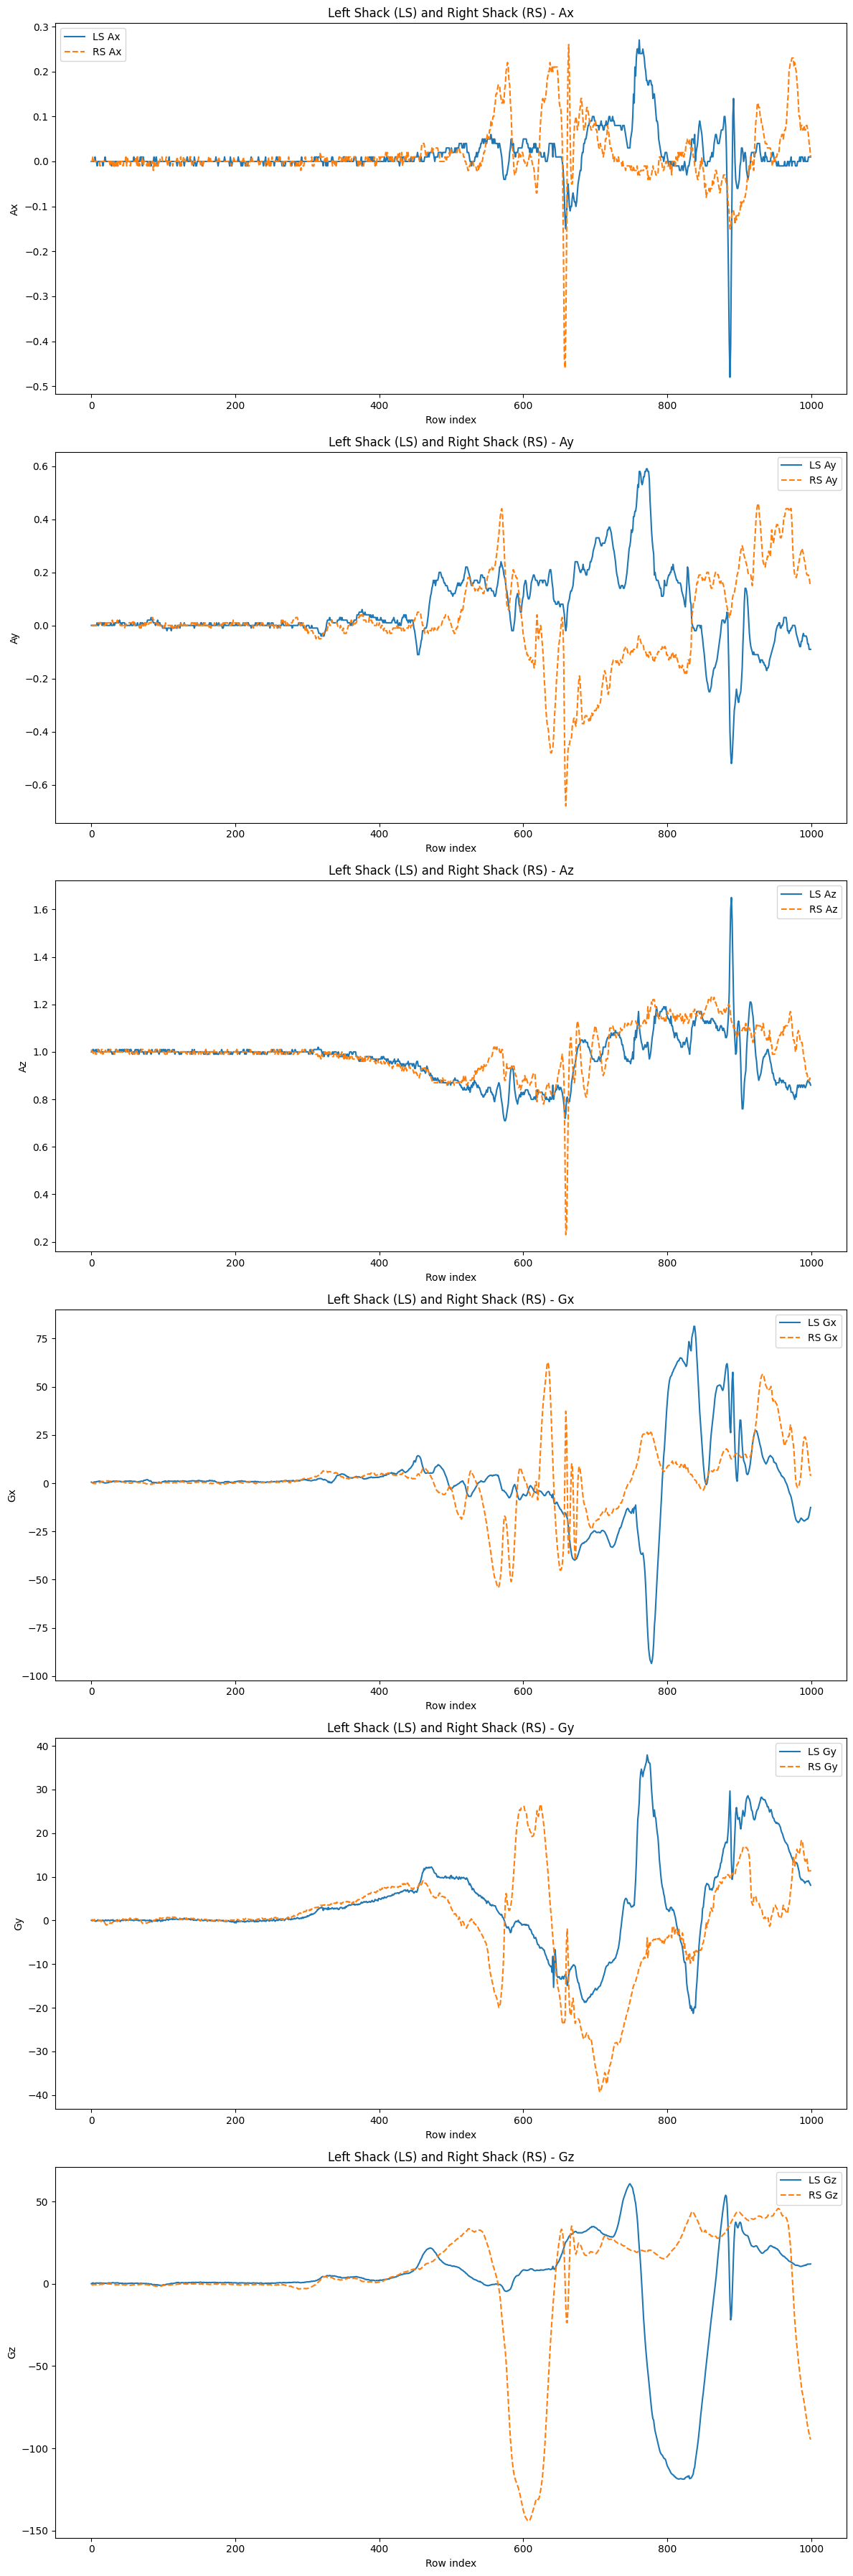

In [8]:
import matplotlib.pyplot as plt

def plot_all_Shack(data):
    fig, axes = plt.subplots(6, 1, figsize=(12, 36))

    comparisons = [
        ('LS', 'RS', 'Ax', 'Left Shack (LS) and Right Shack (RS) - Ax'),
        ('LS', 'RS', 'Ay', 'Left Shack (LS) and Right Shack (RS) - Ay'),
        ('LS', 'RS', 'Az', 'Left Shack (LS) and Right Shack (RS) - Az'),
        ('LS', 'RS', 'Gx', 'Left Shack (LS) and Right Shack (RS) - Gx'),
        ('LS', 'RS', 'Gy', 'Left Shack (LS) and Right Shack (RS) - Gy'),
        ('LS', 'RS', 'Gz', 'Left Shack (LS) and Right Shack (RS) - Gz')
    ]

    for ax, (label1, label2, column, title) in zip(axes, comparisons):
        ax.plot(data[label1].index[:1000], data[label1][column].iloc[:1000], label=f'{label1} {column}')
        ax.plot(data[label2].index[:1000], data[label2][column].iloc[:1000], label=f'{label2} {column}', linestyle='dashed')
        
        ax.set_title(title)
        ax.set_xlabel('Row index')
        ax.set_ylabel(column)
        ax.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
plot_all_Shack(data) 


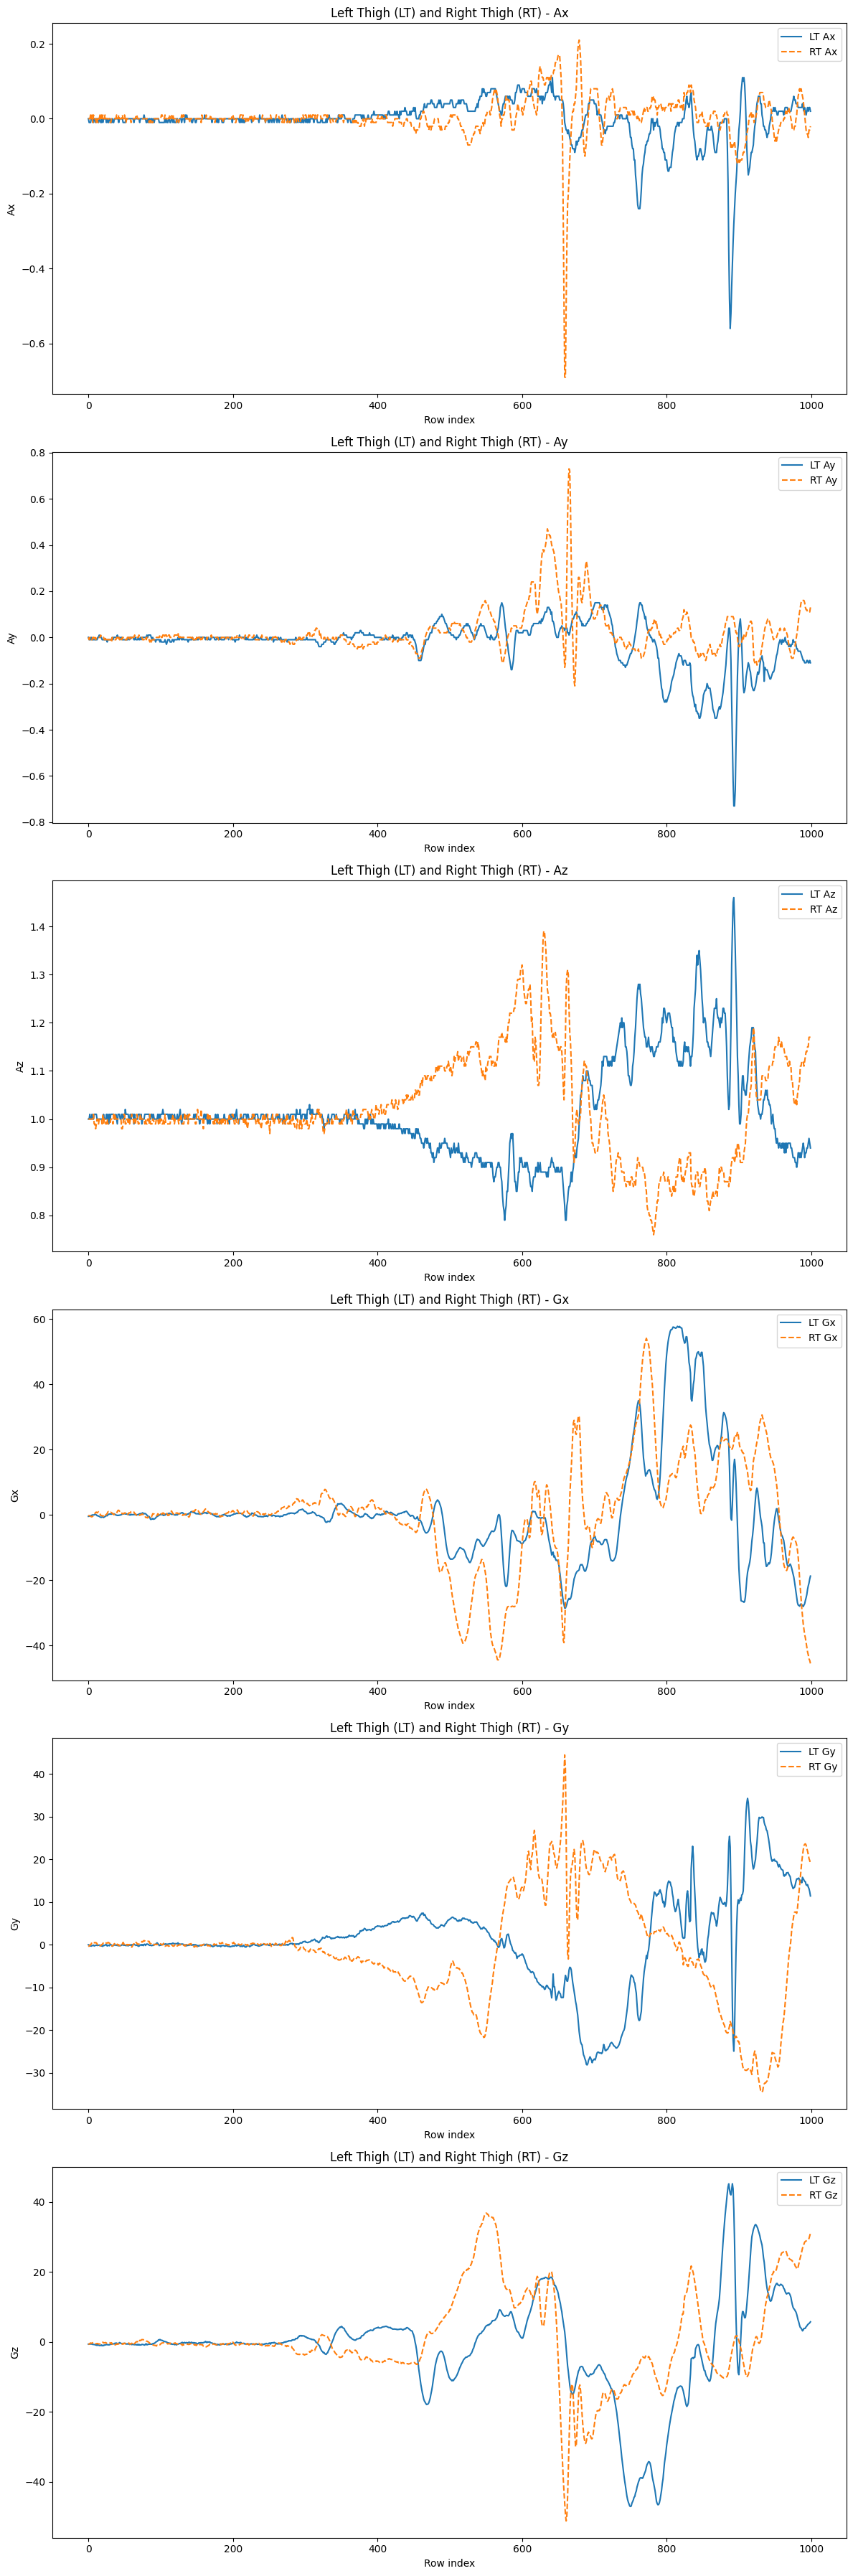

In [9]:
import matplotlib.pyplot as plt

def plot_all_Thigh(data):
    fig, axes = plt.subplots(6, 1, figsize=(12, 36))

    comparisons = [
        ('LT', 'RT', 'Ax', 'Left Thigh (LT) and Right Thigh (RT) - Ax'),
        ('LT', 'RT', 'Ay', 'Left Thigh (LT) and Right Thigh (RT) - Ay'),
        ('LT', 'RT', 'Az', 'Left Thigh (LT) and Right Thigh (RT) - Az'),
        ('LT', 'RT', 'Gx', 'Left Thigh (LT) and Right Thigh (RT) - Gx'),
        ('LT', 'RT', 'Gy', 'Left Thigh (LT) and Right Thigh (RT) - Gy'),
        ('LT', 'RT', 'Gz', 'Left Thigh (LT) and Right Thigh (RT) - Gz')
    ]

    for ax, (label1, label2, column, title) in zip(axes, comparisons):
        ax.plot(data[label1].index[:1000], data[label1][column].iloc[:1000], label=f'{label1} {column}')
        ax.plot(data[label2].index[:1000], data[label2][column].iloc[:1000], label=f'{label2} {column}', linestyle='dashed')
        
        ax.set_title(title)
        ax.set_xlabel('Row index')
        ax.set_ylabel(column)
        ax.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
plot_all_Thigh(data) 


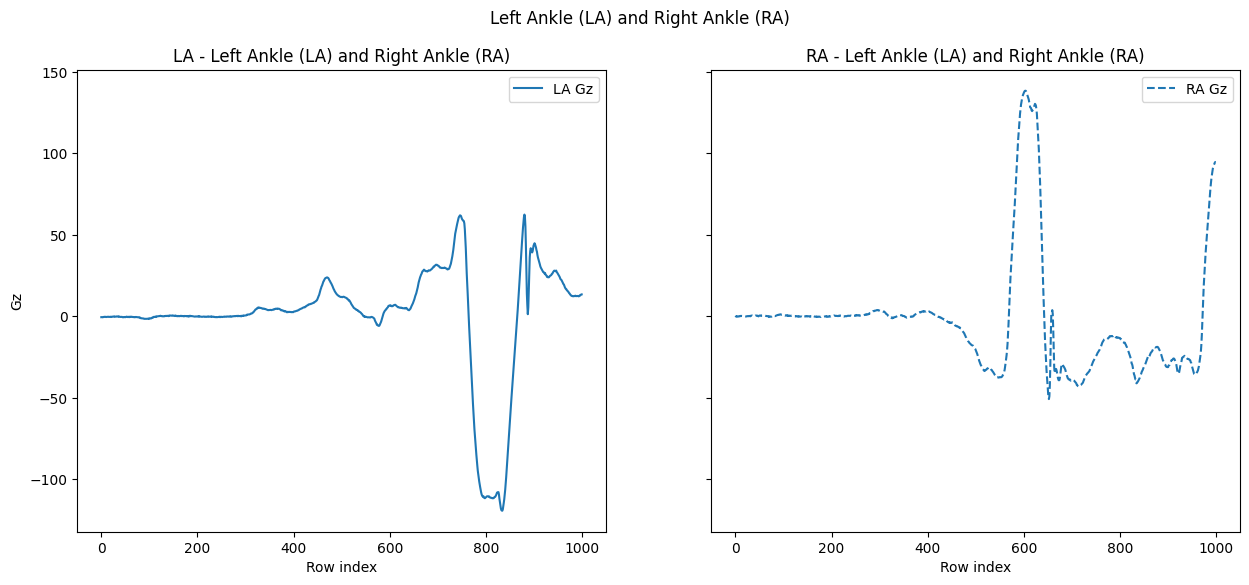

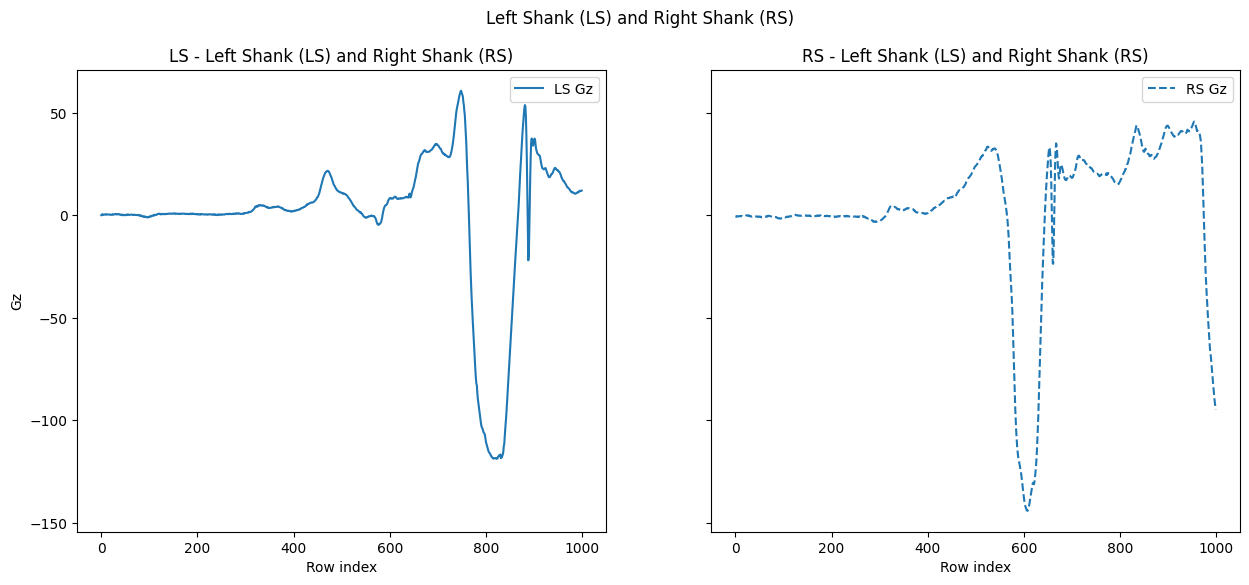

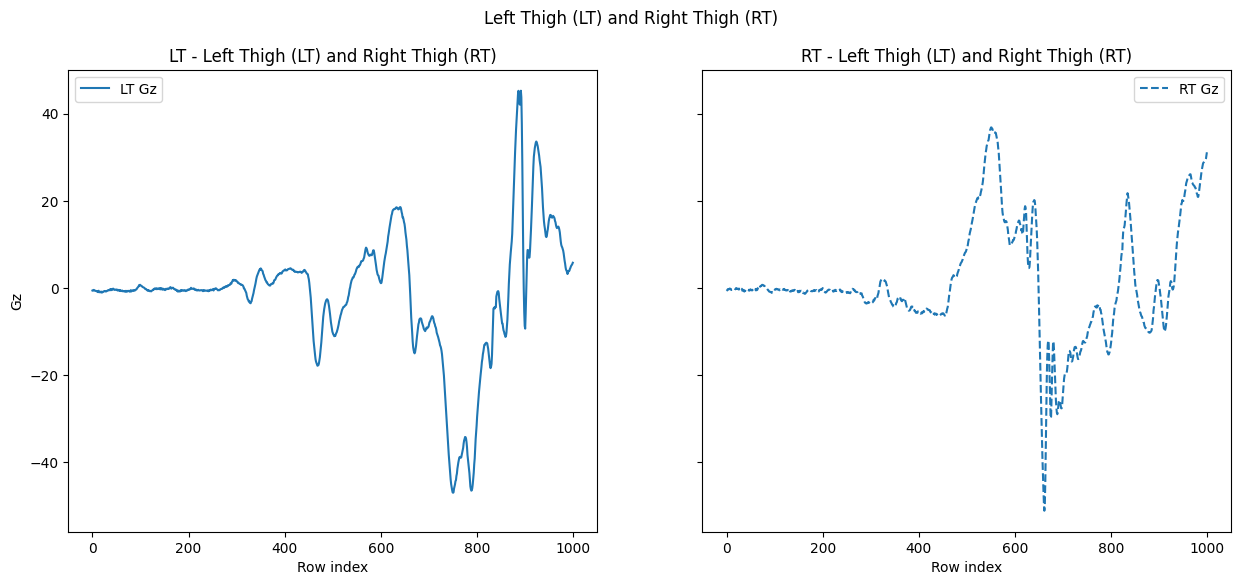

In [10]:
def plot_theta_side(data1, data2, label1, label2, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
    
    # Plot for data1
    ax1.plot(data1.index[:1000], data1['Gz'].iloc[:1000], label=f'{label1} Gz')
    ax1.set_title(f'{label1} - {title}')
    ax1.set_xlabel('Row index')
    ax1.set_ylabel('Gz')
    ax1.legend()
    
    # Plot for data2
    ax2.plot(data2.index[:1000], data2['Gz'].iloc[:1000], label=f'{label2} Gz', linestyle='dashed')
    ax2.set_title(f'{label2} - {title}')
    ax2.set_xlabel('Row index')
    ax2.legend()
    
    plt.suptitle(title)
    plt.show()
    
# Plotting LA and RA together
plot_theta_side(data['LA'], data['RA'], 'LA', 'RA', 'Left Ankle (LA) and Right Ankle (RA)')

# Plotting LK and RK together
plot_theta_side(data['LS'], data['RS'], 'LS', 'RS', 'Left Shank (LS) and Right Shank (RS)')

# Plotting LH and RH together
plot_theta_side(data['LT'], data['RT'], 'LT', 'RT', 'Left Thigh (LT) and Right Thigh (RT)')

In [11]:
# def plot_X_side(data1, data2, label1, label2, title):
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
    
#     # Plot for data1
#     ax1.plot(data1.index[:1000], data1['X (m/s2)'].iloc[:1000], label=f'{label1} X (m/s2)')
#     ax1.set_title(f'{label1} - {title}')
#     ax1.set_xlabel('Row index')
#     ax1.set_ylabel('X (m/s2)')
#     ax1.legend()
    
#     # Plot for data2
#     ax2.plot(data2.index[:1000], data2['X (m/s2)'].iloc[:1000], label=f'{label2} X (m/s2)', linestyle='dashed')
#     ax2.set_title(f'{label2} - {title}')
#     ax2.set_xlabel('Row index')
#     ax2.legend()
    
#     plt.suptitle(title)
#     plt.show()
    
# # Plotting LA and RA together
# plot_X_side(data['LA'], data['RA'], 'LA', 'RA', 'Left Ankle (LA) and Right Ankle (RA)')

# # Plotting LK and RK together
# plot_X_side(data['LK'], data['RK'], 'LK', 'RK', 'Left Knee (LK) and Right Knee (RK)')

# # Plotting LH and RH together
# plot_X_side(data['LH'], data['RH'], 'LH', 'RH', 'Left Hip (LH) and Right Hip (RH)')

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, medfilt, savgol_filter
from scipy.ndimage import gaussian_filter as scipy_gaussian_filter
import pywt

In [13]:
# Function Definitions

def moving_average(data, window_size):
    return data.rolling(window=window_size).mean()

def low_pass_filter(data, cutoff_frequency, sample_rate):
    nyquist = 0.5 * sample_rate
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(1, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

def median_filter(data, kernel_size):
    return medfilt(data, kernel_size)

def gaussian_filter_custom(data, sigma):
    return scipy_gaussian_filter(data, sigma=sigma)

def savitzky_golay_filter(data, window_size, poly_order):
    return savgol_filter(data, window_length=window_size, polyorder=poly_order)

def wavelet_denoising(data, wavelet, level):
    coeffs = pywt.wavedec(data, wavelet, level=level)
    threshold = np.sqrt(2 * np.log(len(data)))
    coeffs[1:] = [pywt.threshold(i, value=threshold, mode='soft') for i in coeffs[1:]]
    return pywt.waverec(coeffs, wavelet)
def wavelet_denoising(data, wavelet='db1', level=1):
    coeffs = pywt.wavedec(data, wavelet, level=level)
    threshold = np.sqrt(2 * np.log(len(data))) * np.median(np.abs(coeffs[-level])) / 0.6745
    new_coeffs = [pywt.threshold(i, value=threshold, mode='soft') for i in coeffs]
    return pywt.waverec(new_coeffs, wavelet)

from scipy.signal import butter, filtfilt

def butterworth_filter(data, cutoff_frequency, sample_rate, order=4):
    nyquist = 0.5 * sample_rate
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data


In [63]:
# Parameters
cutoff_frequency = 20  # Cutoff frequency in Hz
sample_rate = 100       # Sample rate in Hz
order = 4              # Order of the Butterworth filter

In [64]:
# Ensure the columns are numeric
new_data = data['RS'].copy()
columns_to_process = ["Ax", "Ay", "Az", "Gx", "Gy", "Gz"]


In [65]:
# Function to calculate Mean Absolute Error (MAE)
def mean_absolute_error(original, filtered):
    return np.mean(np.abs(original - filtered))

# Function to calculate Mean Squared Error (MSE)
def mean_squared_error(original, filtered):
    return np.mean((original - filtered) ** 2)
data_loss = {}


/var/folders/2d/fcgrngd95_b823fdj1fwwj840000gn/T/ipykernel_62131/3961633232.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data[column].fillna(method='ffill', inplace=True)  # Forward fill for simplicity
/var/folders/2d/fcgrngd95_b823fdj1fwwj840000gn/T/ipykernel_62131/3961633232.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_data[column].fillna(method='ffill', inplace=True)  # Forward fill for simplicity


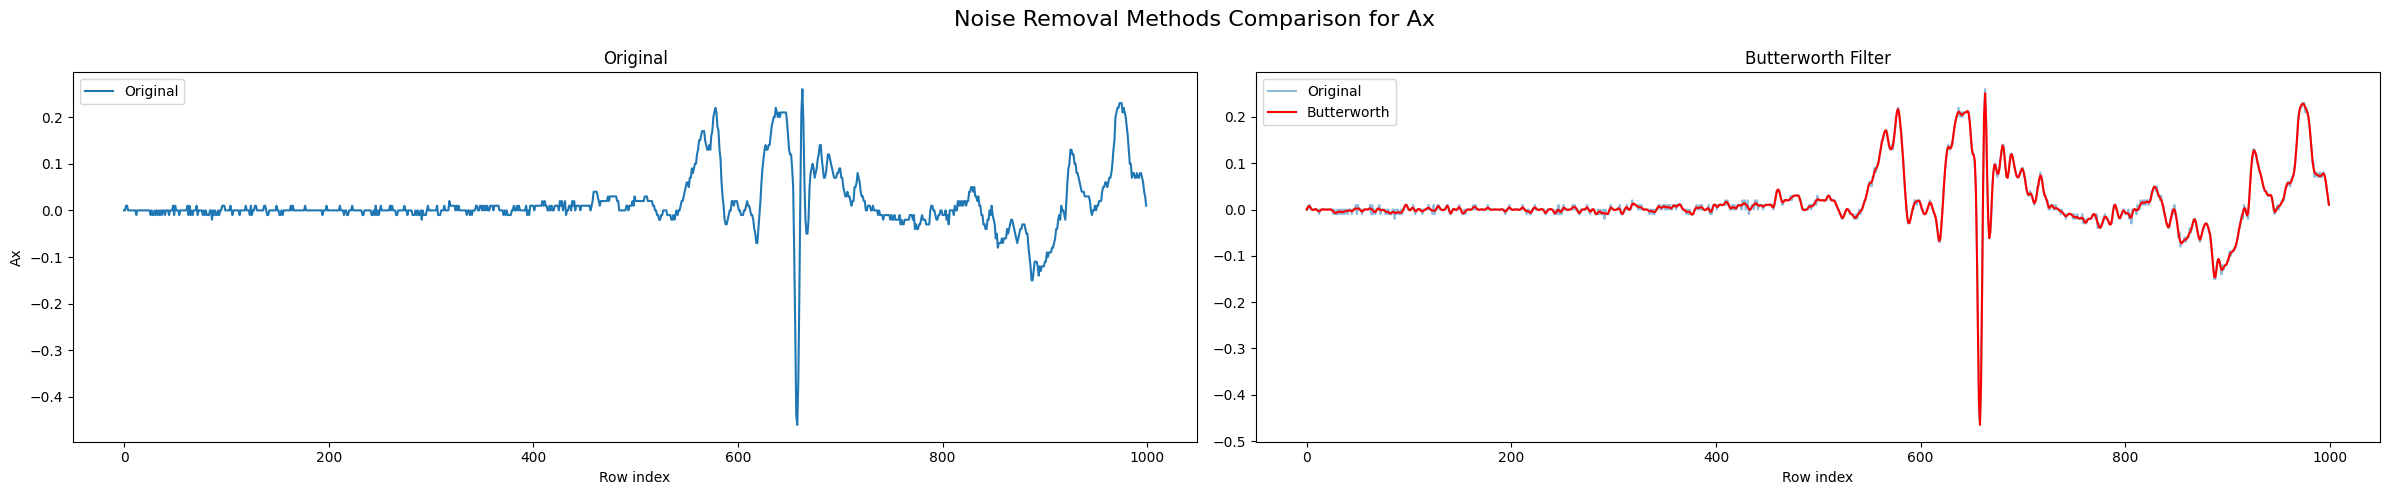

/var/folders/2d/fcgrngd95_b823fdj1fwwj840000gn/T/ipykernel_62131/3961633232.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data[column].fillna(method='ffill', inplace=True)  # Forward fill for simplicity
/var/folders/2d/fcgrngd95_b823fdj1fwwj840000gn/T/ipykernel_62131/3961633232.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_data[column].fillna(method='ffill', inplace=True)  # Forward fill for simplicity


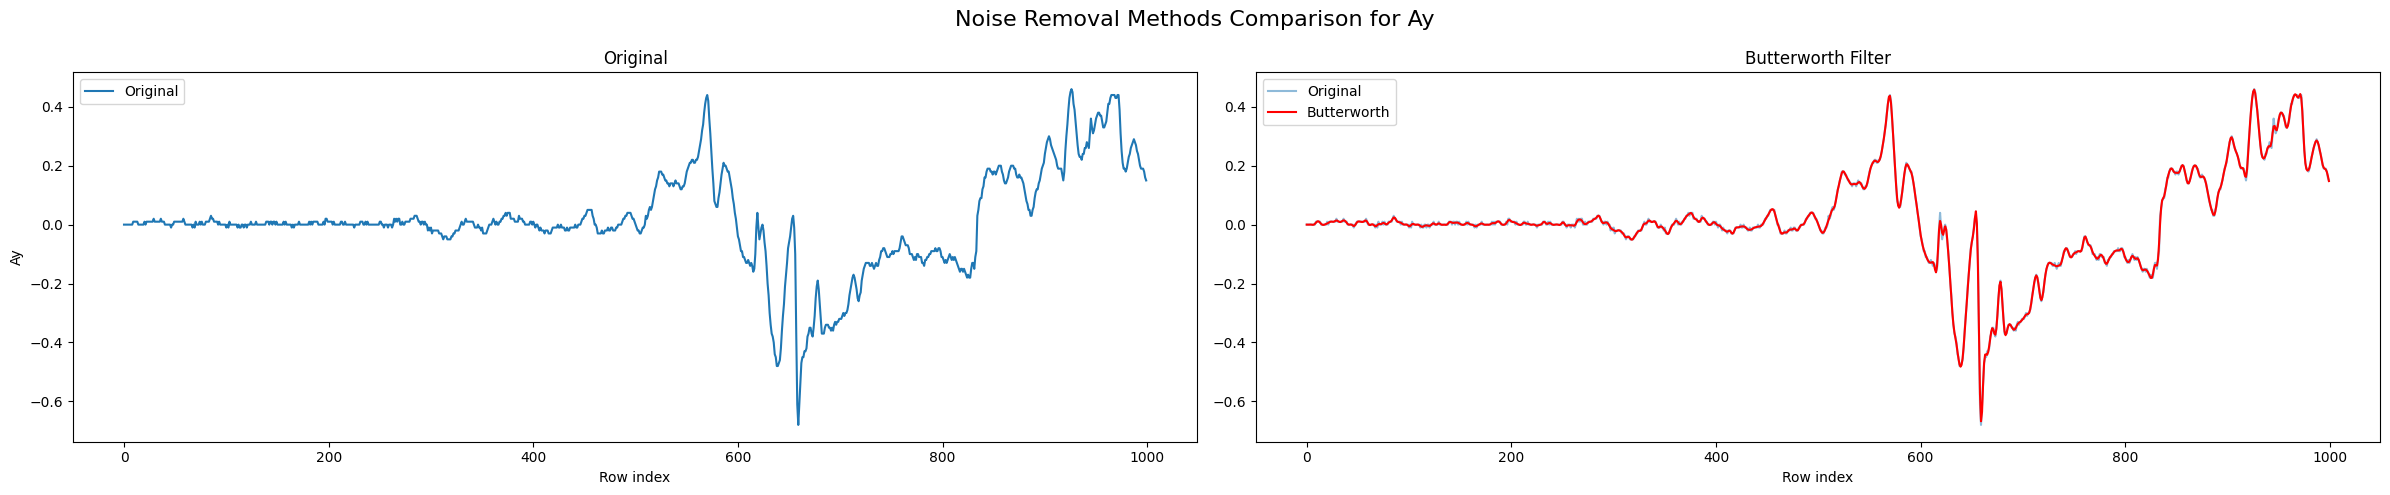

/var/folders/2d/fcgrngd95_b823fdj1fwwj840000gn/T/ipykernel_62131/3961633232.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data[column].fillna(method='ffill', inplace=True)  # Forward fill for simplicity
/var/folders/2d/fcgrngd95_b823fdj1fwwj840000gn/T/ipykernel_62131/3961633232.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_data[column].fillna(method='ffill', inplace=True)  # Forward fill for simplicity


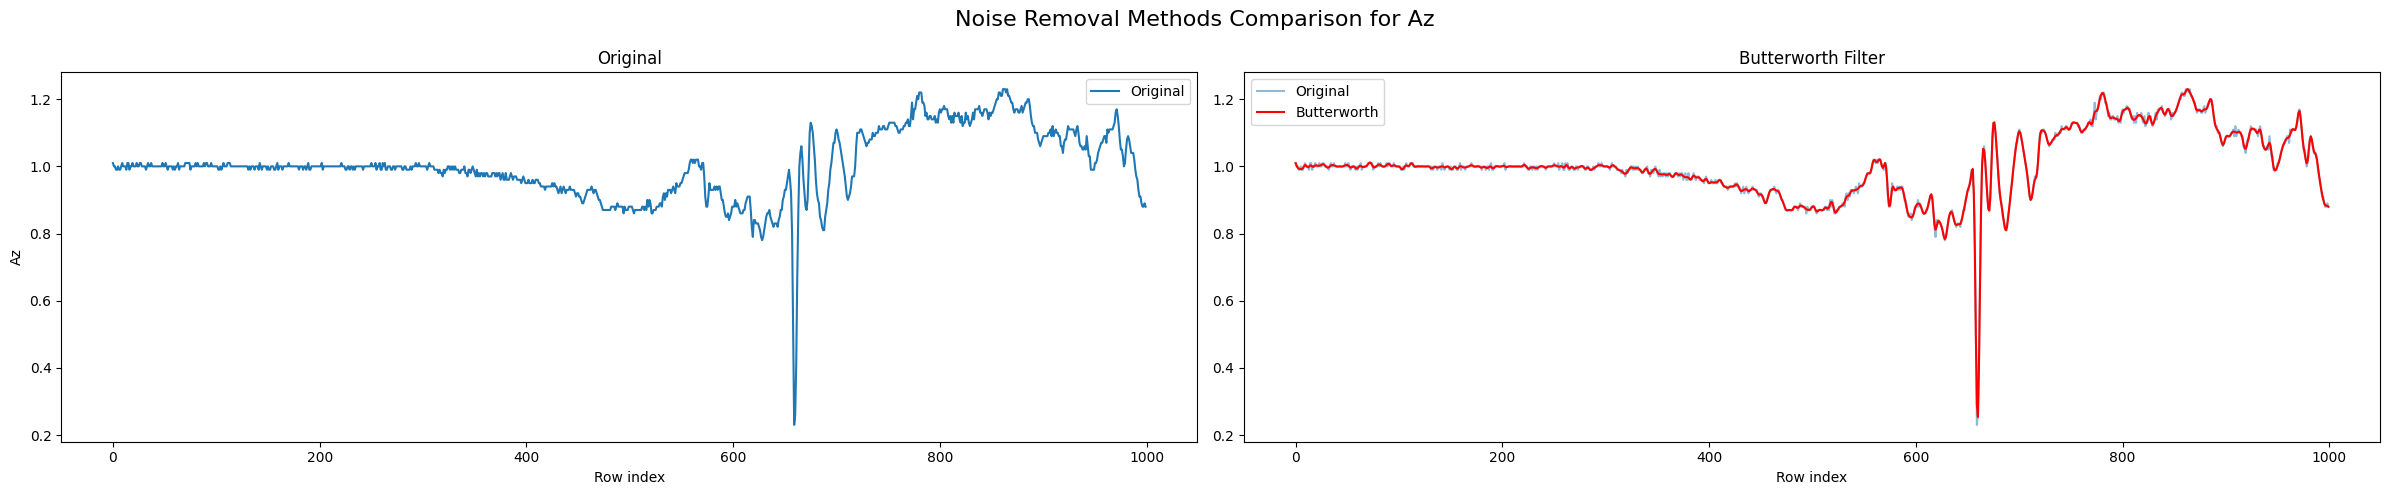

/var/folders/2d/fcgrngd95_b823fdj1fwwj840000gn/T/ipykernel_62131/3961633232.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data[column].fillna(method='ffill', inplace=True)  # Forward fill for simplicity
/var/folders/2d/fcgrngd95_b823fdj1fwwj840000gn/T/ipykernel_62131/3961633232.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_data[column].fillna(method='ffill', inplace=True)  # Forward fill for simplicity


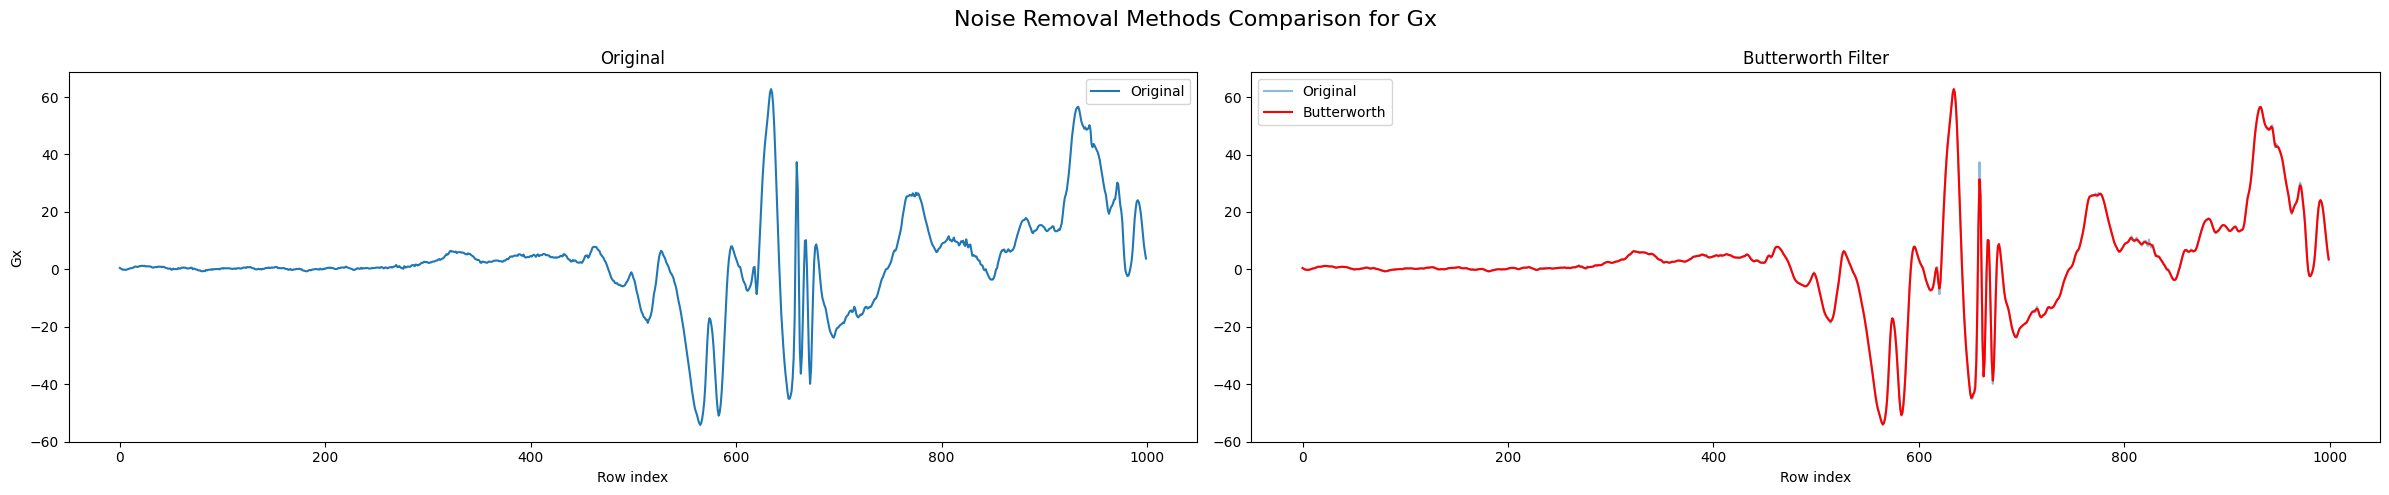

/var/folders/2d/fcgrngd95_b823fdj1fwwj840000gn/T/ipykernel_62131/3961633232.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data[column].fillna(method='ffill', inplace=True)  # Forward fill for simplicity
/var/folders/2d/fcgrngd95_b823fdj1fwwj840000gn/T/ipykernel_62131/3961633232.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_data[column].fillna(method='ffill', inplace=True)  # Forward fill for simplicity


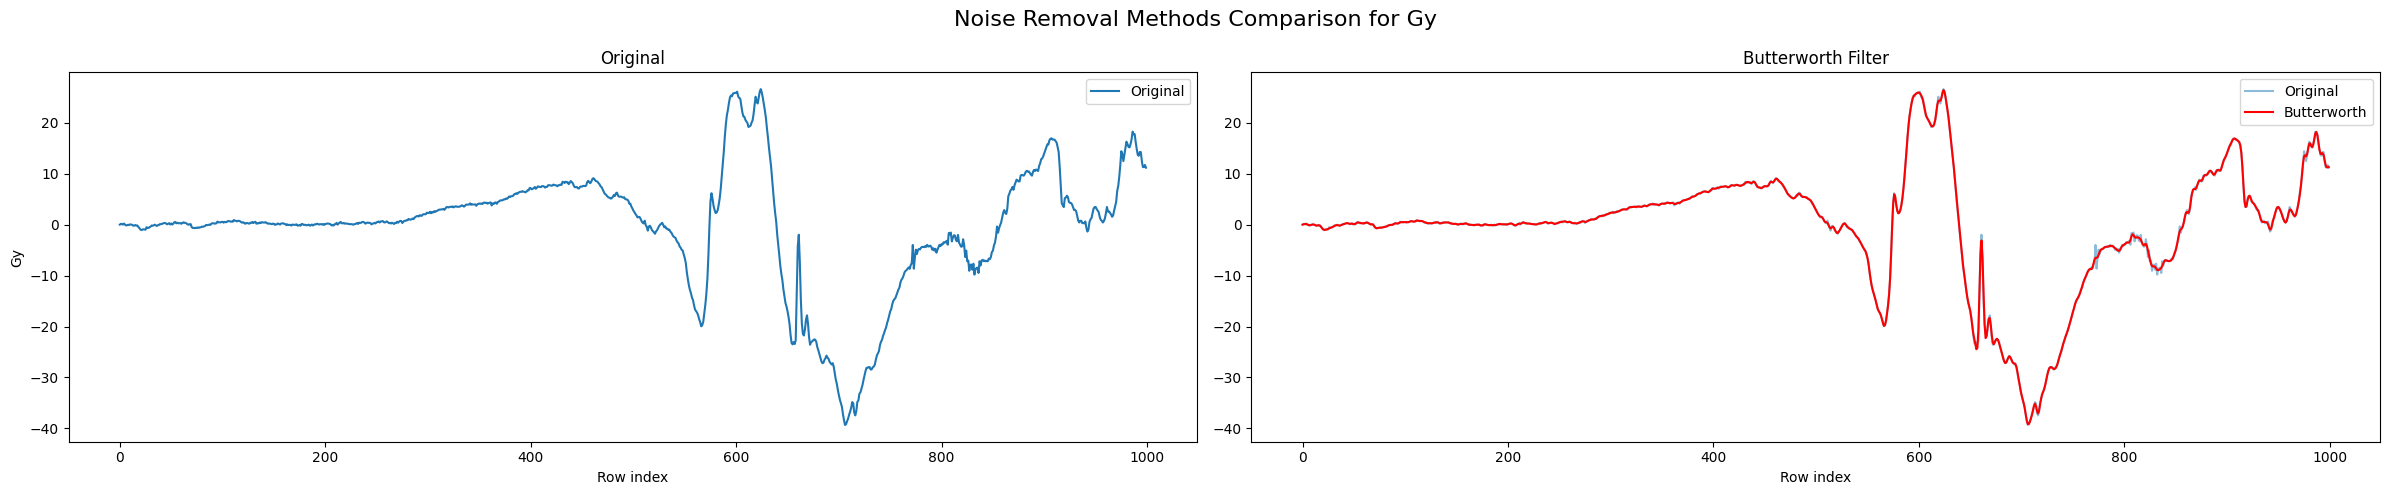

/var/folders/2d/fcgrngd95_b823fdj1fwwj840000gn/T/ipykernel_62131/3961633232.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data[column].fillna(method='ffill', inplace=True)  # Forward fill for simplicity
/var/folders/2d/fcgrngd95_b823fdj1fwwj840000gn/T/ipykernel_62131/3961633232.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_data[column].fillna(method='ffill', inplace=True)  # Forward fill for simplicity


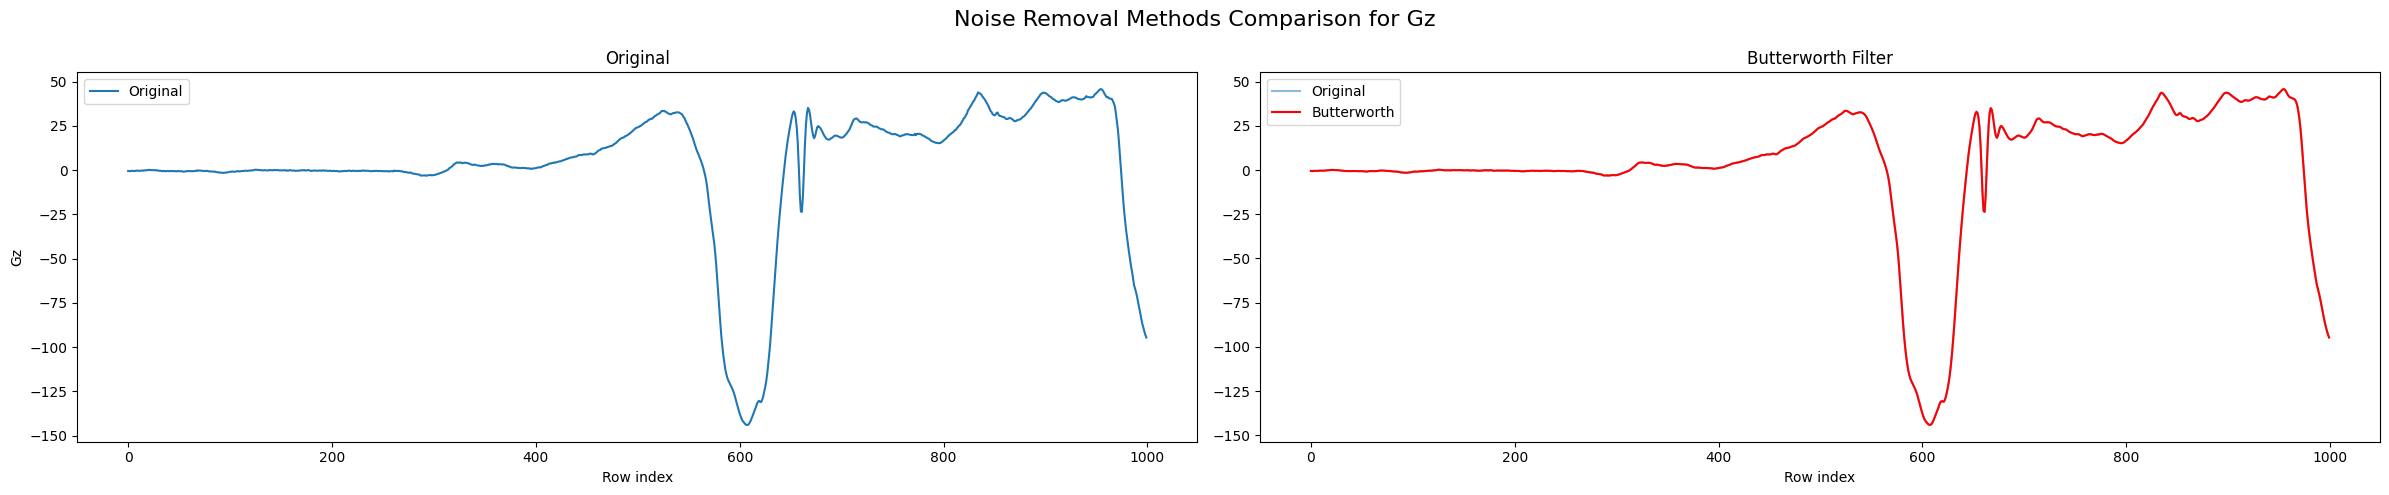

In [66]:
for column in columns_to_process:
    new_data[column] = pd.to_numeric(new_data[column], errors='coerce')
    new_data[column].fillna(method='ffill', inplace=True)  # Forward fill for simplicity

    # Apply noise removal methods
    # new_data[f'{column}_moving_avg'] = moving_average(new_data[column], window_size=5)
    # new_data[f'{column}_low_pass'] = low_pass_filter(new_data[column], cutoff_frequency=0.1, sample_rate=100)
    # new_data[f'{column}_median'] = median_filter(new_data[column], kernel_size=5)
    # new_data[f'{column}_gaussian'] = gaussian_filter_custom(new_data[column], sigma=1)
    # new_data[f'{column}_savgol'] = savitzky_golay_filter(new_data[column], window_size=11, poly_order=3)
    # new_data[f'{column}_wavelet'] = wavelet_denoising(new_data[column], wavelet='db1', level=1)
    
     # Apply median filter
    # new_data[f'{column}_median'] = median_filter(new_data[column], kernel_size=7)
    new_data[f'{column}_butterworth'] = butterworth_filter(new_data[column], cutoff_frequency, sample_rate, order)
    # Apply Gaussian filter on the result of the median filter
    # new_data[f'{column}_median_gaussian'] = gaussian_filter_custom(new_data[f'{column}_median'], sigma=1.2)
    
    
    # Calculate data loss
    data_loss[column] = {
        # 'Median + Gaussian MAE': mean_absolute_error(new_data[column], new_data[f'{column}_median_gaussian']),
        # 'Median + Gaussian MSE': mean_squared_error(new_data[column], new_data[f'{column}_median_gaussian']),
        'Butterworth MAE': mean_absolute_error(new_data[column], new_data[f'{column}_butterworth']),
        'Butterworth MSE': mean_squared_error(new_data[column], new_data[f'{column}_butterworth']),
        
        # 'Moving Avg MAE': mean_absolute_error(new_data[column], new_data[f'{column}_moving_avg']),
        # 'Moving Avg MSE': mean_squared_error(new_data[column], new_data[f'{column}_moving_avg']),
        # 'Low-pass Filter MAE': mean_absolute_error(new_data[column], new_data[f'{column}_low_pass']),
        # 'Low-pass Filter MSE': mean_squared_error(new_data[column], new_data[f'{column}_low_pass']),
        # 'Median Filter MAE': mean_absolute_error(new_data[column], new_data[f'{column}_median']),
        # 'Median Filter MSE': mean_squared_error(new_data[column], new_data[f'{column}_median']),
        # 'Gaussian Filter MAE': mean_absolute_error(new_data[column], new_data[f'{column}_gaussian']),
        # 'Gaussian Filter MSE': mean_squared_error(new_data[column], new_data[f'{column}_gaussian']),
        # 'Savgol Filter MAE': mean_absolute_error(new_data[column], new_data[f'{column}_savgol']),
        # 'Savgol Filter MSE': mean_squared_error(new_data[column], new_data[f'{column}_savgol']),
        # 'Wavelet Denoising MAE': mean_absolute_error(new_data[column], new_data[f'{column}_wavelet']),
        # 'Wavelet Denoising MSE': mean_squared_error(new_data[column], new_data[f'{column}_wavelet']),
    }
    # Plot results
    def plot_comparison(data, column):
        fig, axs = plt.subplots(1, 2, figsize=(24, 5))
        fig.suptitle(f'Noise Removal Methods Comparison for {column}', fontsize=16)
        
        # Original
        axs[0].plot(data.index[:1000], data[column][:1000], label='Original')
        axs[0].set_title('Original')
        axs[0].set_xlabel('Row index')
        axs[0].set_ylabel(column)

        # Median Filter
        # axs[1].plot(data.index[:1000], data[column][:1000], label='Original', alpha=0.5)
        # axs[1].plot(data.index[:1000], data[f'{column}_median'][:1000], label='Median Filtered', color='red')
        # axs[1].set_title('Median Filter')
        # axs[1].set_xlabel('Row index')

        # Median + Gaussian Filter
        # axs[2].plot(data.index[:1000], data[column][:1000], label='Original', alpha=0.5)
        # axs[2].plot(data.index[:1000], data[f'{column}_median_gaussian'][:1000], label='Median + Gaussian Filtered', color='red')
        # axs[2].set_title('Median + Gaussian Filter')
        # axs[2].set_xlabel('Row index')
        
        # Median Filter
        axs[1].plot(data.index[:1000], data[column][:1000], label='Original', alpha=0.5)
        axs[1].plot(data.index[:1000], data[f'{column}_butterworth'][:1000], label='Butterworth', color='red')
        axs[1].set_title('Butterworth Filter')
        axs[1].set_xlabel('Row index')

        for ax in axs:
            ax.legend()
        
        plt.tight_layout()
        plt.show()

    plot_comparison(new_data, column)


In [32]:
# Plot the results
def plot_comparison(data, label, column):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Noise Removal Methods Comparison for {label}', fontsize=16)
    
    # Original
    axs[0].plot(data.index[:1000], data[column][:1000], label='Original')
    axs[0].set_title('Original')
    axs[0].set_xlabel('Row index')
    axs[0].set_ylabel(label)

    # Moving Average
    axs[1].plot(data.index[:1000], data[column][:1000], label='Original', alpha=0.5)
    axs[1].plot(data.index[:1000], data[f'{column}_moving_avg'][:1000], label='Filtered', color='red')
    axs[1].set_title('Moving Average')
    axs[1].set_xlabel('Row index')

    # Low-pass Filter
    axs[2].plot(data.index[:1000], data[column][:1000], label='Original', alpha=0.5)
    axs[2].plot(data.index[:1000], data[f'{column}_low_pass'][:1000], label='Filtered', color='red')
    axs[2].set_title('Low-pass Filter')
    axs[2].set_xlabel('Row index')

    # Median Filter
    axs[1].plot(data.index[:1000], data[column][:1000], label='Original', alpha=0.5)
    axs[1].plot(data.index[:1000], data[f'{column}_median'][:1000], label='Filtered', color='red')
    axs[1].set_title('Median Filter')
    axs[1].set_xlabel('Row index')

    # Gaussian Filter
    axs[2].plot(data.index[:1000], data[column][:1000], label='Original', alpha=0.5)
    axs[2].plot(data.index[:1000], data[f'{column}_gaussian'][:1000], label='Filtered', color='red')
    axs[2].set_title('Gaussian Filter')
    axs[2].set_xlabel('Row index')

    # Savitzky-Golay Filter
    axs[5].plot(data.index[:1000], data[column][:1000], label='Original', alpha=0.5)
    axs[5].plot(data.index[:1000], data[f'{column}_savgol'][:1000], label='Filtered', color='red')
    axs[5].set_title('Savitzky-Golay Filter')
    axs[5].set_xlabel('Row index')
    
    # Wavelet Denoising
    axs[6].plot(data.index[:1000], data[column][:1000], label='Original', alpha=0.5)
    axs[6].plot(data.index[:1000], data[f'{column}_wavelet'][:1000], label='Filtered', color='red')
    axs[6].set_title('Wavelet Denoising')
    axs[6].set_xlabel('Row index')
    
    for ax in axs:
        ax.legend()
    
    plt.tight_layout()
    plt.show()

IndexError: index 5 is out of bounds for axis 0 with size 3

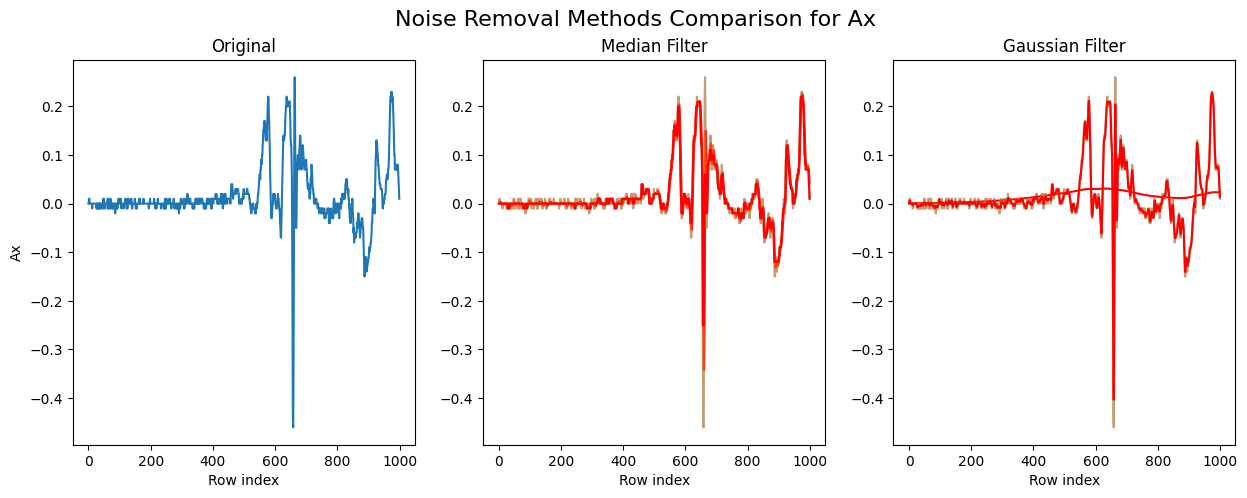

In [33]:
for column in columns_to_process:
    plot_comparison(new_data, column, column)

In [34]:
# Display data loss
for column, losses in data_loss.items():
    print(f'Data Loss for {column}:')
    for method, loss in losses.items():
        print(f'  {method}: {loss}')
    print()

Data Loss for Ax:
  Median + Gaussian MAE: 0.014679945265768293
  Median + Gaussian MSE: 0.0018161884214580673
  Butterworth MAE: 0.09059857984630494
  Butterworth MSE: 0.020558925030599712
  Moving Avg MAE: 0.034074132492113565
  Moving Avg MSE: 0.006666900315457413
  Low-pass Filter MAE: 0.08872869260037008
  Low-pass Filter MSE: 0.02008582824206063
  Median Filter MAE: 0.009117276166456495
  Median Filter MSE: 0.0011937578814627994
  Gaussian Filter MAE: 0.00673122016433644
  Gaussian Filter MSE: 0.00024585299486827025
  Savgol Filter MAE: 0.01101450593332683
  Savgol Filter MSE: 0.0007735652939766492
  Wavelet Denoising MAE: 0.023173329889149705
  Wavelet Denoising MSE: 0.0007809734450098788

Data Loss for Ay:
  Median + Gaussian MAE: 0.015503107919820134
  Median + Gaussian MSE: 0.0024905347668213204
  Butterworth MAE: 0.16192382719584567
  Butterworth MSE: 0.05121075722969481
  Moving Avg MAE: 0.04131482649842272
  Moving Avg MSE: 0.006823851104100946
  Low-pass Filter MAE: 0.150

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Dictionary to store the best methods
best_methods = {}

# Evaluate the data loss
for column, losses in data_loss.items():
    print(f'Data Loss for {column}:')
    
    # Initialize best values
    best_mae = float('inf')
    best_mse = float('inf')
    best_mae_method = None
    best_mse_method = None
    
    # Print the data loss for each method and find the best one
    for method, loss in losses.items():
        print(f'  {method}: {loss}')
        if 'MAE' in method:
            if loss < best_mae:
                best_mae = loss
                best_mae_method = method
        elif 'MSE' in method:
            if loss < best_mse:
                best_mse = loss
                best_mse_method = method

    best_methods[column] = {
        'Best MAE Method': best_mae_method,
        'Best MAE': best_mae,
        'Best MSE Method': best_mse_method,
        'Best MSE': best_mse
    }
    
    print()

# Display the best method for each column
print("Best Noise Removal Methods:")
for column, best in best_methods.items():
    print(f'{column}:')
    print(f'  Best MAE Method: {best["Best MAE Method"]} with MAE = {best["Best MAE"]}')
    print(f'  Best MSE Method: {best["Best MSE Method"]} with MSE = {best["Best MSE"]}')
    print()


Data Loss for Ax:
  Median + Gaussian MAE: 0.014679945265768293
  Median + Gaussian MSE: 0.0018161884214580673
  Butterworth MAE: 0.09059857984630494
  Butterworth MSE: 0.020558925030599712
  Moving Avg MAE: 0.034074132492113565
  Moving Avg MSE: 0.006666900315457413
  Low-pass Filter MAE: 0.08872869260037008
  Low-pass Filter MSE: 0.02008582824206063
  Median Filter MAE: 0.009117276166456495
  Median Filter MSE: 0.0011937578814627994
  Gaussian Filter MAE: 0.00673122016433644
  Gaussian Filter MSE: 0.00024585299486827025
  Savgol Filter MAE: 0.01101450593332683
  Savgol Filter MSE: 0.0007735652939766492
  Wavelet Denoising MAE: 0.023173329889149705
  Wavelet Denoising MSE: 0.0007809734450098788

Data Loss for Ay:
  Median + Gaussian MAE: 0.015503107919820134
  Median + Gaussian MSE: 0.0024905347668213204
  Butterworth MAE: 0.16192382719584567
  Butterworth MSE: 0.05121075722969481
  Moving Avg MAE: 0.04131482649842272
  Moving Avg MSE: 0.006823851104100946
  Low-pass Filter MAE: 0.150